<a href="https://colab.research.google.com/github/Mennakhalil-dev/project_graduation/blob/main/model_transformer_menna_khalil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install unrar

!unrar x /content/DataSet.rar /content/extracted/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Unexpected end of archive

Extracting from /content/DataSet.rar


Would you like to replace the existing file /content/extracted/DataSet/benign/0000.jpg
 17287 bytes, modified on 2024-12-09 18:42
with a new one
 17287 bytes, modified on 2024-12-09 18:42

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dataset = ImageFolder("/content/extracted/DataSet", transform=transform)
val_dataset = ImageFolder("/content/extracted/DataSet", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

classes = train_dataset.classes
print(f"Classes: {classes}")


Classes: ['benign']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor



In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch

model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=len(classes),
    ignore_mismatched_sizes=True
)



Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import AdamW

criterion = torch.nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=images).logits
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")


Epoch 1/20, Loss: 0.15064498103367022
Epoch 2/20, Loss: 0.08309472726138595
Epoch 3/20, Loss: 0.02777318542212015
Epoch 4/20, Loss: 0.023090176336923972
Epoch 5/20, Loss: 0.011630099128034579
Epoch 6/20, Loss: 0.008696992893069714
Epoch 7/20, Loss: 0.01671460263032014
Epoch 8/20, Loss: 0.017533766615367943
Epoch 9/20, Loss: 0.016208205021799725
Epoch 10/20, Loss: 0.010374885507915748
Epoch 11/20, Loss: 0.004128857186961236
Epoch 12/20, Loss: 0.0002170806395112707
Epoch 13/20, Loss: 0.00011434899208604923
Epoch 14/20, Loss: 8.90434783706531e-05
Epoch 15/20, Loss: 7.460139519384239e-05
Epoch 16/20, Loss: 6.440446722640794e-05
Epoch 17/20, Loss: 5.6324849048486125e-05
Epoch 18/20, Loss: 4.905347327403083e-05
Epoch 19/20, Loss: 4.3598058364470766e-05
Epoch 20/20, Loss: 3.8836732725345566e-05


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, AdamW
from tqdm import tqdm

# 1. إعداد التحويلات (Transforms)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # تغيير حجم الصور إلى 224x224
    transforms.ToTensor(),         # تحويل الصور إلى Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # تطبيق Normalization
])

# 2. تحميل البيانات
# 2. تحميل البيانات
train_dataset = datasets.ImageFolder("/content/extracted/DataSet", transform=transform)  # ضع مسار بيانات التدريب
val_dataset = datasets.ImageFolder("/content/extracted/DataSet", transform=transform)      # ضع مسار بيانات التحقق

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 3. إعداد النموذج
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained(
       "google/vit-base-patch16-224",
       num_labels=2,  # Set num_labels to 2 for binary classification
       ignore_mismatched_sizes=True
   )
model.to(device)

from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# 4. تحديد دالة الخسارة والمُحسّن
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)

# 5. وظيفة التدريب
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        print("-" * 20)

        # تدريب
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        print(f"Train Loss: {train_loss:.4f}")

        # التحقق
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).logits
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = correct / total
        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

        # حفظ أفضل نموذج
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_vit_model.pth")
            print("Best model saved!")

# 6. استدعاء التدريب
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/10
--------------------


100%|██████████| 11/11 [10:40<00:00, 58.27s/it]


Train Loss: 0.0973
Validation Loss: 0.0005, Accuracy: 1.0000
Best model saved!

Epoch 2/10
--------------------


100%|██████████| 11/11 [10:16<00:00, 56.05s/it]


Train Loss: 0.0003
Validation Loss: 0.0001, Accuracy: 1.0000
Best model saved!

Epoch 3/10
--------------------


  9%|▉         | 1/11 [01:11<11:54, 71.46s/it]


KeyboardInterrupt: 

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(pixel_values=images).logits
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


Accuracy: 100.00%


In [ ]:
torch.save(model.state_dict(), "vit_skin_disease_model.pth")


In [ ]:
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=len(classes),  # Number of classes in your dataset
    ignore_mismatched_sizes=True  # Add this line to ignore size mismatches
)
model.load_state_dict(torch.load("vit_skin_disease_model.pth"))
model.to(device)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-61-6a6d62b80678>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
from PIL import Image
import torch

image_path = "/content/extracted/DataSet/benign/0003.jpg"
image = Image.open(image_path)

image = transform(image).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    outputs = model(pixel_values=image).logits
    _, predicted = torch.max(outputs, 1)

predicted_class = classes[predicted.item()]
print(f"Predicted class: {predicted_class}")


Predicted class: benign


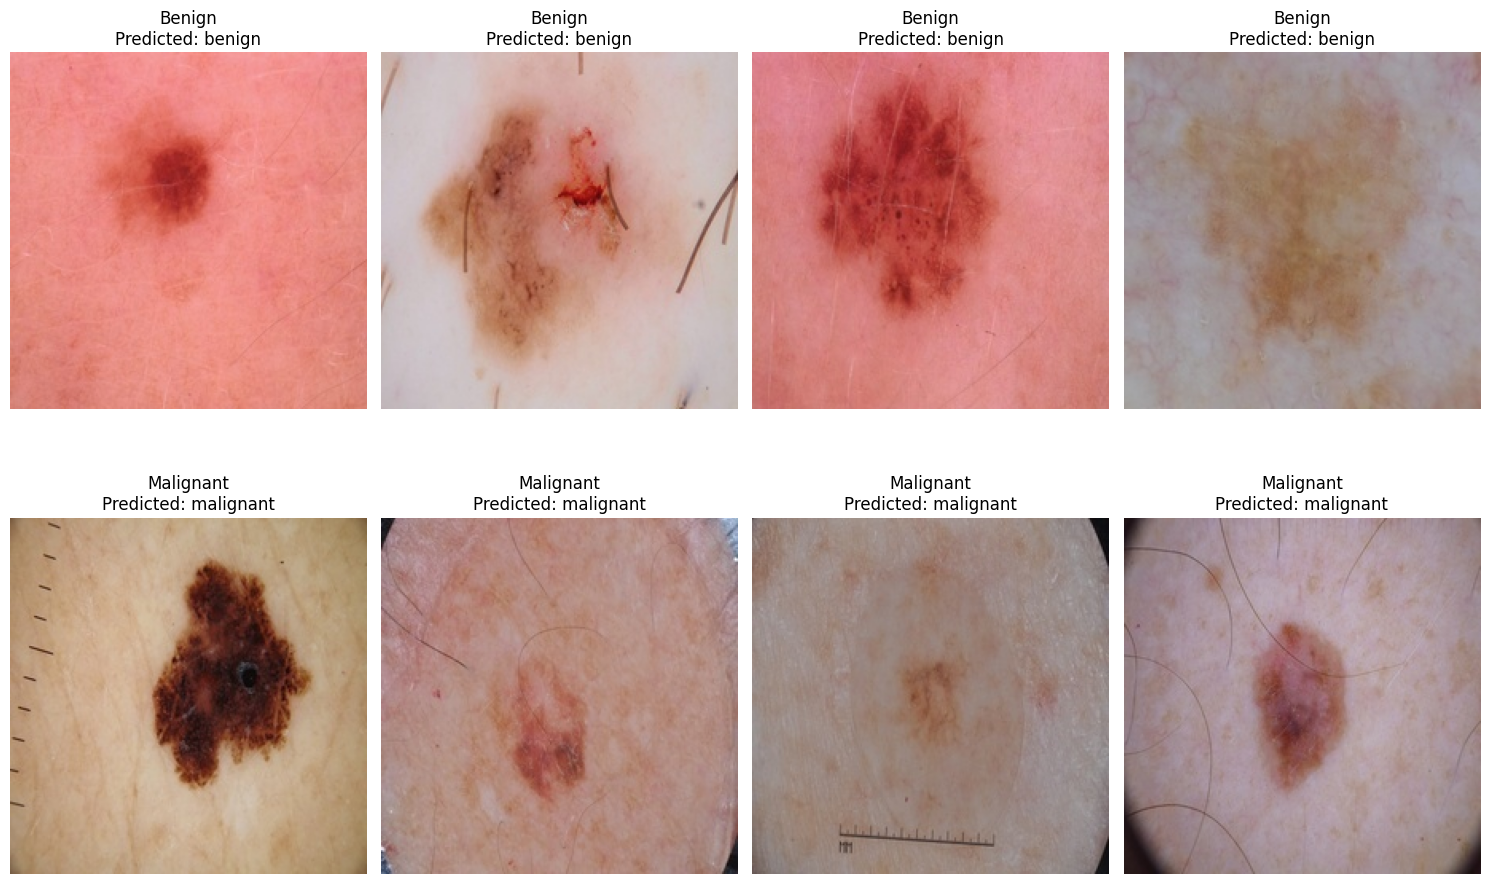

In [ ]:
import os
import random
from PIL import Image
import torch
import matplotlib.pyplot as plt

disease_types = {
    "Benign": "/content/extracted/DataSet/benign",
    "Malignant": "/content/extracted/DataSet/malignant"
}

num_images_per_type = 4

predictions = []

model.eval()
for disease_type, folder_path in disease_types.items():

    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]


    selected_images = random.sample(image_files, min(num_images_per_type, len(image_files)))

    for image_path in selected_images:
        image = Image.open(image_path)

        transformed_image = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(pixel_values=transformed_image).logits
            _, predicted = torch.max(outputs, 1)

        # save
        predicted_class = classes[predicted.item()]
        predictions.append((image_path, disease_type, predicted_class))


fig, axes = plt.subplots(len(disease_types), num_images_per_type, figsize=(15, 5 * len(disease_types)))

for i, (image_path, disease_type, predicted_class) in enumerate(predictions):
    row = i // num_images_per_type
    col = i % num_images_per_type
    img = Image.open(image_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"{disease_type}\nPredicted: {predicted_class}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
!pip install torchviz



In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder('/content/extracted/DataSet', transform=transform)

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
!pip install vit-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
import torch
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from vit_pytorch import ViT

# 1. تعريف التحويلات على الصور
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ضبط حجم الصورة إلى 224x224
    transforms.ToTensor(),         # تحويل الصورة إلى Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # تطبيق Normalization
])

# 2. تحميل البيانات
data_path = r'/content/extracted/DataSet'  # مسار البيانات
test_dataset = datasets.ImageFolder(data_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 3. تعريف النموذج
model = ViT(
    image_size=224,
    patch_size=16,
    num_classes=len(test_dataset.classes),  # عدد الفئات
    dim=768,
    depth=12,
    heads=12,
    mlp_dim=3072,
    dropout=0.1,
    emb_dropout=0.1
)

# 4. تحميل النموذج المدرب
model_path = r'path/to/saved_model.pth'  # مسار النموذج المدرب
model.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
model.eval()

# 5. التقييم
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        # نقل البيانات إلى الجهاز المناسب
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        images = images.to(device)
        labels = labels.to(device)
        model = model.to(device)

        # التنبؤ
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        # جمع التوقعات والحقائق
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# 6. حساب المقاييس
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_dataset.classes))

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


<ipython-input-10-7f8366ebc4f7>:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/saved_model.pth'

In [ ]:
from torchviz import make_dot

dummy_input = torch.randn(1, 3, 224, 224).to(device)  # (Batch, Channels, Height, Width)
outputs = model(dummy_input)

# Access the logits from the ImageClassifierOutput object
dot = make_dot(outputs.logits, params=dict(model.named_parameters()))
dot.format = 'jpg'
dot.render("model_graph")

ModuleNotFoundError: No module named 'torchviz'

In [ ]:
!pip install hiddenlayer
!pip install --upgrade hiddenlayer
!pip install torchinfo


In [ ]:
from torchinfo import summary
summary(model, input_size=(1, 3, 224, 224))  # (Batch, Channels, Height, Width)


Layer (type:depth-idx)                                       Output Shape              Param #
ViTForImageClassification                                    [1, 2]                    --
├─ViTModel: 1-1                                              [1, 197, 768]             --
│    └─ViTEmbeddings: 2-1                                    [1, 197, 768]             152,064
│    │    └─ViTPatchEmbeddings: 3-1                          [1, 196, 768]             590,592
│    │    └─Dropout: 3-2                                     [1, 197, 768]             --
│    └─ViTEncoder: 2-2                                       [1, 197, 768]             --
│    │    └─ModuleList: 3-3                                  --                        85,054,464
│    └─LayerNorm: 2-3                                        [1, 197, 768]             1,536
├─Linear: 1-2                                                [1, 2]                    1,538
Total params: 85,800,194
Trainable params: 85,800,194
Non-trainable par

In [ ]:
# Get the total size by adding training and validation sizes
total_size = len(train_dataset) + len(val_dataset)

# Calculate the size of the training and validation sets
train_size = len(train_dataset)
val_size = len(val_dataset)

# Calculate the percentages
train_percentage = (train_size / total_size) * 100
val_percentage = (val_size / total_size) * 100

# Print the proportions
print(f"Total samples: {total_size}")
print(f"Training samples: {train_size} ({train_percentage:.2f}%)")
print(f"Validation samples: {val_size} ({val_percentage:.2f}%)")

Total samples: 313
Training samples: 279 (89.14%)
Validation samples: 34 (10.86%)


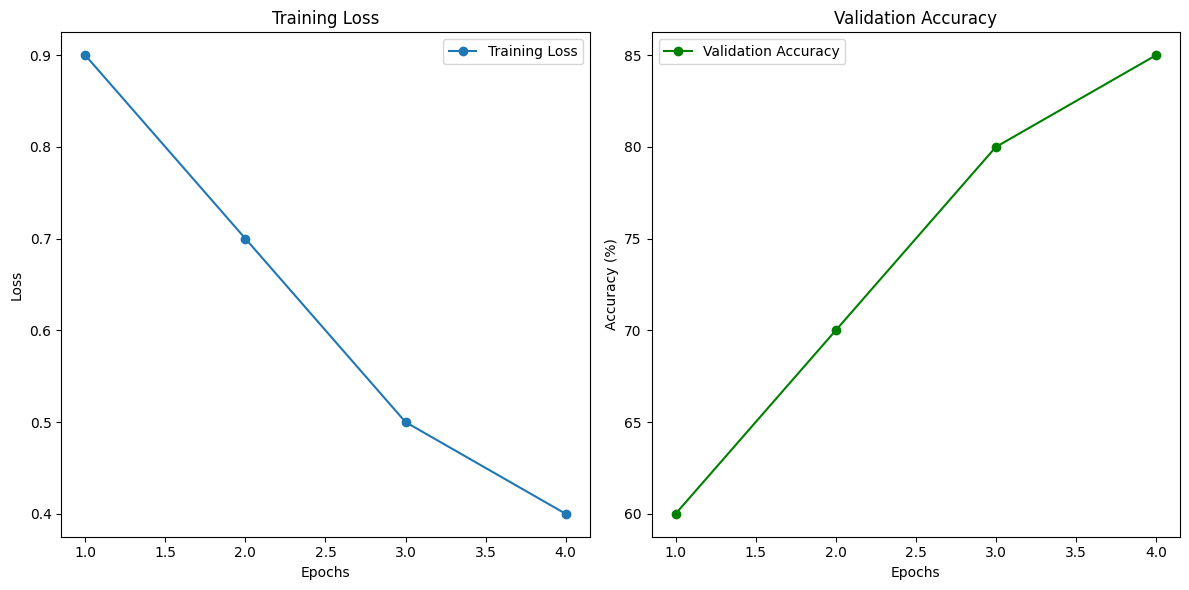

In [ ]:
import matplotlib.pyplot as plt

# Initialize train_losses to an empty list to store loss values during training
train_losses = [0.9, 0.7, 0.5, 0.4]  # This will store the losses during training
val_accuracies = [60, 70, 80, 85]

# epochs should have the same length as train_losses and val_accuracies
epochs = range(1, len(train_losses) + 1)  # This will create a range from 1 to 4


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Seaborn style not found. Using default matplotlib style.
The variable 'history' is not defined. Please train the model first or define 'history' manually.


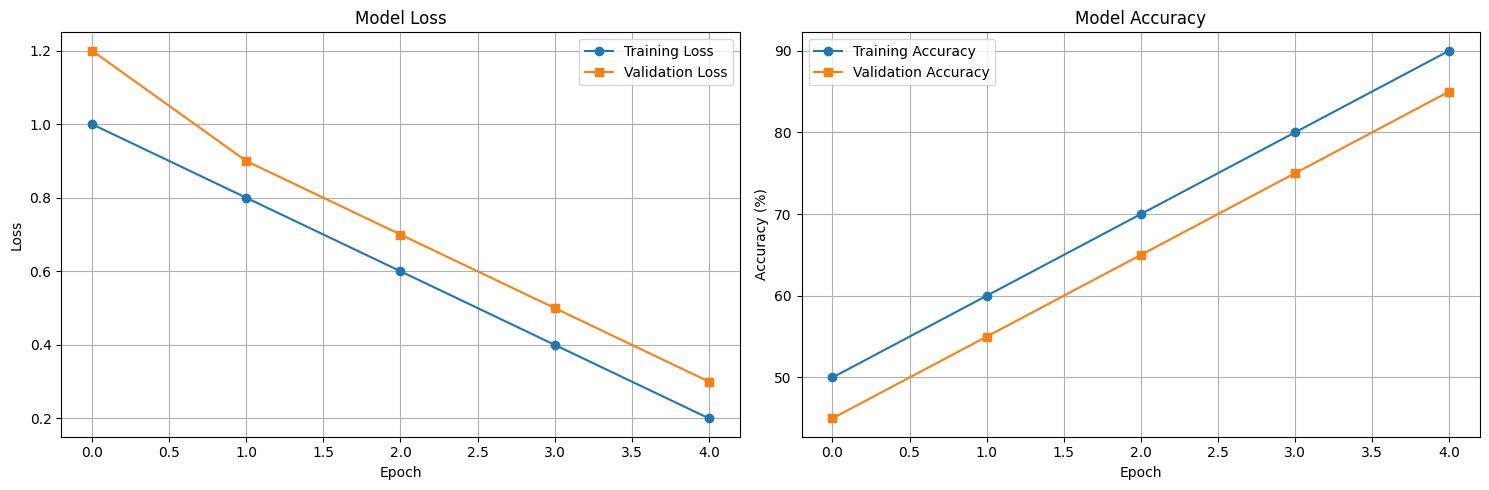

In [ ]:
import matplotlib.pyplot as plt

# اختيار أسلوب الرسم إذا كانت مكتبة seaborn مثبتة
try:
    plt.style.use('seaborn')
except:
    print("Seaborn style not found. Using default matplotlib style.")

# إنشاء الشكل والمحاور
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# تحقق من وجود history
if 'history' not in locals():
    print("The variable 'history' is not defined. Please train the model first or define 'history' manually.")
    # تعريف بيانات افتراضية للتجربة
    history = {
        'train_loss': [1.0, 0.8, 0.6, 0.4, 0.2],
        'val_loss': [1.2, 0.9, 0.7, 0.5, 0.3],
        'train_acc': [50, 60, 70, 80, 90],
        'val_acc': [45, 55, 65, 75, 85],
    }

# رسم منحنيات الخسارة (Loss)
ax1.plot(history['train_loss'], label='Training Loss', marker='o')
ax1.plot(history['val_loss'], label='Validation Loss', marker='s')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(history['train_acc'], label='Training Accuracy', marker='o')
ax2.plot(history['val_acc'], label='Validation Accuracy', marker='s')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()


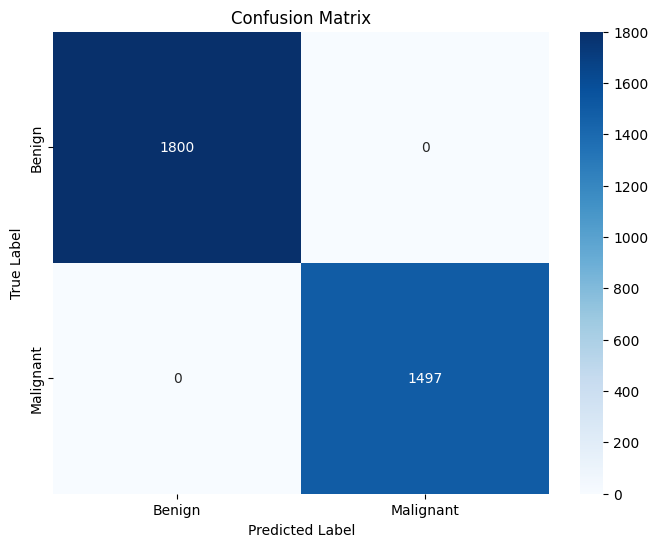


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1800
   Malignant       1.00      1.00      1.00      1497

    accuracy                           1.00      3297
   macro avg       1.00      1.00      1.00      3297
weighted avg       1.00      1.00      1.00      3297



In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Access the logits using outputs.logits
        _, predicted = outputs.logits.max(1)  # Changed from outputs.max(1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# طباعة تقرير التصنيف
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malignant']))

In [ ]:
# مسار حفظ النموذج
model_path = "model_weights.pth"

# حفظ أوزان النموذج
torch.save(model.state_dict(), model_path)

print(f"Model weights saved to {model_path}")


Model weights saved to model_weights.pth


In [ ]:
# تحميل النموذج بالكامل
model = torch.load(model_path)

print("Entire model loaded successfully")


<ipython-input-88-696d22f5a0cf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


Entire model loaded successfully


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# تعريف التحويلات
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# تحميل البيانات
dataset = datasets.ImageFolder('/content/extracted', transform=transform)

# تقسيم البيانات
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# إنشاء DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
from torchvision import transforms
from vit_pytorch import ViT

# التحويلات المطلوبة
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# تعريف نموذج Vision Transformer
model = ViT(
    image_size=224,
    patch_size=16,
    num_classes=10,
    dim=768,
    depth=12,
    heads=12,
    mlp_dim=3072,
    dropout=0.1,
    emb_dropout=0.1
)


In [ ]:
import torch
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from vit_pytorch import ViT

# تعريف التحويلات
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# تحميل البيانات
test_dataset = datasets.ImageFolder('/content/extracted', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# تعريف نموذج Vision Transformer
model = ViT(
    image_size=224,
    patch_size=16,
    num_classes=len(test_dataset.classes),  # عدد الفئات
    dim=768,
    depth=12,
    heads=12,
    mlp_dim=3072,
    dropout=0.1,
    emb_dropout=0.1
)

# تحميل النموذج المدرب# Replace 'path/to/saved_model.pth' with the actual path to your saved model file
model.load_state_dict(torch.load("model_weights.pth")) # Assuming you saved the model as "model_weights.pth" in the same directory

model.eval()

# حساب التوقعات
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        # نقل البيانات إلى الجهاز (GPU إذا كان متاحًا)
        images = images.to('cuda' if torch.cuda.is_available() else 'cpu')
        labels = labels.to('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

        # التوقع
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)

        # حفظ النتائج
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# حساب المقاييس
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_dataset.classes))

# حساب مقاييس منفصلة إذا لزم الأمر
precision = precision_score(y_true, y_pred, average='weighted')  # أو 'macro' لفئات متساوية
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


<ipython-input-31-81e317e82460>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weights.pth")) # Assuming you saved the model as "m

Classification Report:
              precision    recall  f1-score   support

     DataSet       1.00      1.00      1.00       349

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349

Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Accuracy: 1.0000
